In [774]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [775]:
job = pd.read_csv(r"C:\Users\user\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [776]:
job.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,HourlyRate,JobSatisfaction,MaritalStatus,MonthlyRate,OverTime,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,94,4,Single,19479,Yes,6,0
1,49,No,Travel_Frequently,8,61,2,Married,24907,No,10,1
2,37,Yes,Travel_Rarely,2,92,3,Single,2396,Yes,0,0


In [777]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   HourlyRate               1470 non-null   int64 
 5   JobSatisfaction          1470 non-null   int64 
 6   MaritalStatus            1470 non-null   object
 7   MonthlyRate              1470 non-null   int64 
 8   OverTime                 1470 non-null   object
 9   YearsAtCompany           1470 non-null   int64 
 10  YearsSinceLastPromotion  1470 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 126.5+ KB


In [778]:
job.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DistanceFromHome           0
HourlyRate                 0
JobSatisfaction            0
MaritalStatus              0
MonthlyRate                0
OverTime                   0
YearsAtCompany             0
YearsSinceLastPromotion    0
dtype: int64

In [779]:
job.describe()

,Age,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyRate,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,65.891156,2.728571,14313.103401,7.008163,2.187755
std,9.135373,8.106864,20.329428,1.102846,7117.786044,6.126525,3.222430
min,18.000000,1.000000,30.000000,1.000000,2094.000000,0.000000,0.000000
25%,30.000000,2.000000,48.000000,2.000000,8047.000000,3.000000,0.000000
50%,36.000000,7.000000,66.000000,3.000000,14235.500000,5.000000,1.000000
75%,43.000000,14.000000,83.750000,4.000000,20461.500000,9.000000,3.000000
max,60.000000,29.000000,100.000000,4.000000,26999.000000,40.000000,15.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'HourlyRate'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'YearsAtCompany'}>],
       [<Axes: title={'center': 'YearsSinceLastPromotion'}>, <Axes: >,
        <Axes: >]], dtype=object)

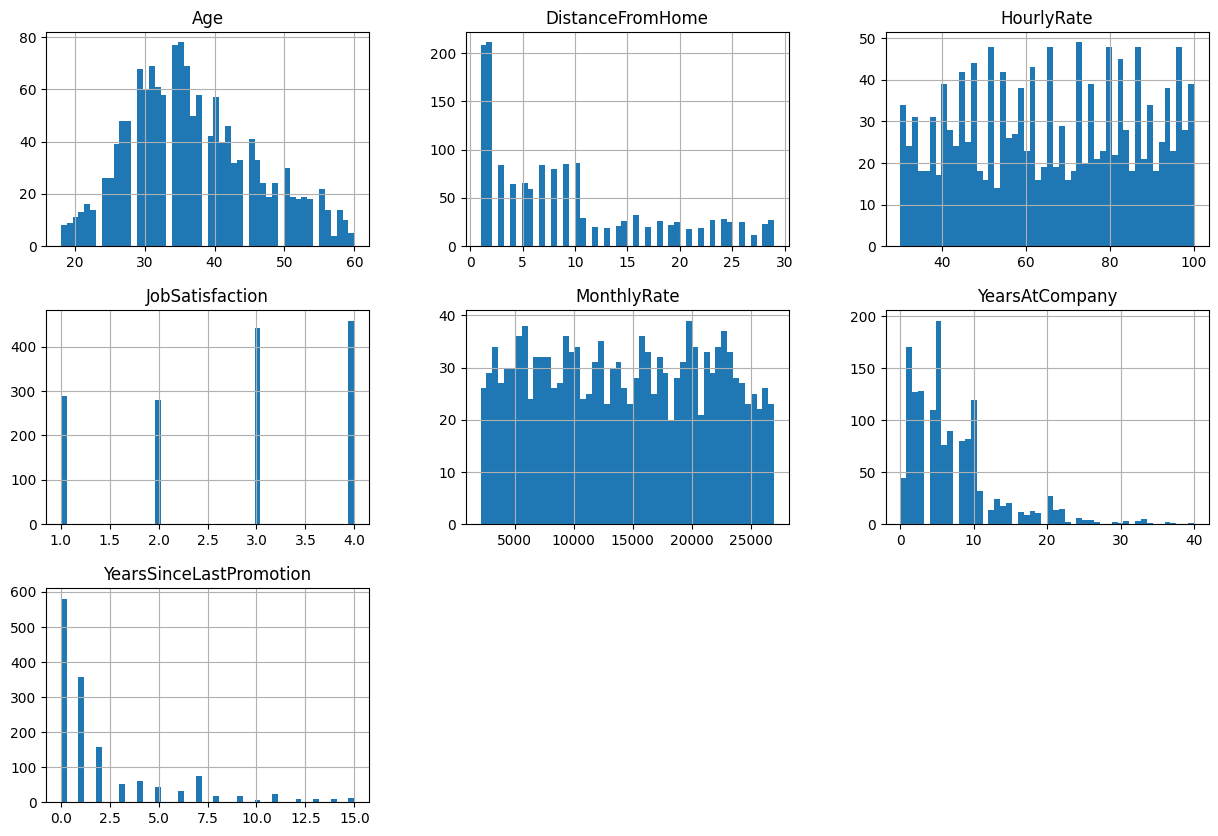

In [780]:
job.hist(bins=50, figsize=(15, 10))

In [781]:
job_cat = job.select_dtypes(include="object").columns

Encoding

In [782]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
for en_col in job_cat:
    job[en_col] = la.fit_transform(job[en_col])

In [783]:
job.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,HourlyRate,JobSatisfaction,MaritalStatus,MonthlyRate,OverTime,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1,94,4,2,19479,1,6,0
1,49,0,1,8,61,2,1,24907,0,10,1
2,37,1,2,2,92,3,2,2396,1,0,0
3,33,0,1,3,56,3,1,23159,1,8,3
4,27,0,2,2,40,2,1,16632,0,2,2


In [784]:
X = job.drop("Attrition", axis=1)
y = job["Attrition"]

In [785]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [786]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)


In [787]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [788]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier(n_estimators =100,
    criterion = "gini",
    max_depth = 5,
    class_weight= "balanced")
rd.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [789]:
rd.score(X_train, y_train),rd.score(X_test, y_test)

(0.8016359918200409, 0.7721088435374149)

In [790]:
#y_pred = rd.predict(X_test)

In [791]:
y_pred = (rd.predict_proba(X_test)[:, 1] >= 0.45).astype(int)

In [792]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7129713423831071

In [793]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_test, y_pred)


array([[174,  81],
       [ 10,  29]])

In [794]:
#precision
pr = precision_score(y_test,y_pred)
print("precision_score",pr)
#recall
rs = recall_score(y_test,y_pred)
print("recall_score", rs)
#f1_score

f1 = f1_score(y_test,y_pred)
print("f1_score", f1)

precision_score 0.2636363636363636
recall_score 0.7435897435897436
f1_score 0.38926174496644295


In [795]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test ,y_pred))

0.30952380952380953


In [796]:
from sklearn.model_selection import KFold, StratifiedGroupKFold
ka = KFold(n_splits= 5)

In [805]:
from sklearn.model_selection import cross_val_score
scor = cross_val_score(rd, X_train, y_train, cv=ka, scoring= "accuracy")
print("all kfold accuracy",scor)
print("mean",scor.mean())

all kfold accuracy [0.77806122 0.71099744 0.71611253 0.75959079 0.77749361]
mean 0.748451119578266


In [798]:
#lr.predict([[]])

In [799]:
#y_pred = sv.predict(X_test)


In [800]:
y_pred = (rd.predict_proba(X_test)[:, 1] >= 0.45).astype(int)

In [801]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)


0.7129713423831071

In [802]:
import pandas as pd

compare = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

compare.head(50)   # top 10 dekhne ke liye


,Actual,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


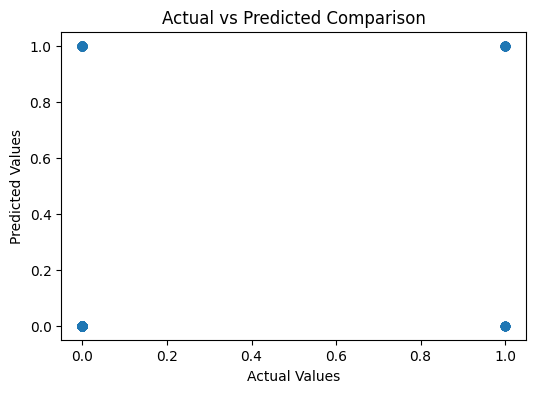

In [803]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(compare["Actual"], compare["Predicted"])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Comparison")
plt.show()


In [806]:
import joblib

joblib.dump(rd,"employee_attrition_model.pkl")

['employee_attrition_model.pkl']

In [813]:
import joblib
import pandas as pd

# Load model
model = joblib.load("employee_attrition_model.pkl")

# New employee data (same columns order!)
new_employee = pd.DataFrame([{
    "Age": 29,
    "BusinessTravel": 2,
    "DistanceFromHome": 10,
    "HourlyRate": 70,
    "JobSatisfaction": 3,
    "MaritalStatus": 2,
    "MonthlyRate": 15000,
    "OverTime": 1,
    "YearsAtCompany": 1,
    "YearsSinceLastPromotion": 1
}])

# Predict
prediction = model.predict(new_employee)
probability = model.predict_proba(new_employee)[0][1]

print("Will employee leave? (1=Yes, 0=No):", prediction[0])
print("Attrition probability:", probability)


Will employee leave? (1=Yes, 0=No): 0
Attrition probability: 0.2884438233189146


c:\Users\user\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
